# Lending Club Case Study

#### AIM:
1. To reduce credit loss by identifying risky applicants likely to default (charged-off)
2. Using EDA, the goal is to uncover key driver variables indicating default risk
3. Outcome of the case study will guide portfolio management and improve risk assessment

#### Analysis Process:
1. Data Understanding
2. Data Cleansing
3. EDA on the use case

In [1]:
import numpy as np
import pandas as pd
from google.colab import files
import io
import seaborn as sns
import matplotlib.pyplot as plt

uploaded = files.upload()
# loading the data
loan_data = pd.read_csv(io.BytesIO(uploaded['loan.csv']))


Saving loan.csv to loan.csv


/tmp/ipython-input-3901946143.py:10: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data = pd.read_csv(io.BytesIO(uploaded['loan.csv']))


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Data Understanding

In [40]:
#Display top 5 records
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,month,year
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011
2,1077175,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011
3,1076863,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011
5,1075269,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,...,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0,12,2011


In [39]:
#Information about the dataframe
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          38577 non-null  int64         
 1   member_id                   38577 non-null  int64         
 2   loan_amnt                   38577 non-null  int64         
 3   funded_amnt                 38577 non-null  int64         
 4   funded_amnt_inv             38577 non-null  float64       
 5   term                        38577 non-null  int64         
 6   int_rate                    38577 non-null  float64       
 7   installment                 38577 non-null  float64       
 8   grade                       38577 non-null  object        
 9   sub_grade                   38577 non-null  object        
 10  emp_title                   36191 non-null  object        
 11  emp_length                  33036 non-null  float64       


In [41]:
display(loan_data['issue_d'])

,issue_d
0,2011-12-01
1,2011-12-01
2,2011-12-01
3,2011-12-01
5,2011-12-01
...,...
39712,2007-07-01
39713,2007-07-01
39714,2007-07-01
39715,2007-07-01


### Data Cleansing

Calculate the percentage of missing values for each column and display the columns with missing values and their percentages.

In [2]:
missing_values = loan_data.isnull().sum()
missing_values_percentage = (missing_values / len(loan_data)) * 100
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0].sort_values(ascending=False)
# percentage of missing values in each column
display(missing_values_percentage)

,0
tot_cur_bal,100.000000
open_acc_6m,100.000000
open_il_6m,100.000000
mths_since_last_major_derog,100.000000
pct_tl_nvr_dlq,100.000000
...,...
collections_12_mths_ex_med,0.140998
revol_util,0.125891
tax_liens,0.098195
title,0.027696


We can see that many columns have 100% missing values. We drop all those columns those columns from the dataset

In [3]:
# removing the columns having more than 100% missing values
columns_to_drop = missing_values_percentage[missing_values_percentage == 100].index.tolist()
loan_data = loan_data.drop(columns=columns_to_drop)

print(f"Dropped {len(columns_to_drop)} columns with 100% missing values.")
print("Remaining columns:", loan_data.columns.tolist())

Dropped 54 columns with 100% missing values.
Remaining columns: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


In [4]:
# display the dropped columns
print("Dropped columns:",columns_to_drop)

Dropped columns: ['tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'mths_since_last_major_derog', 'pct_tl_nvr_dlq', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'tot_coll_amt', 'verification_status_joint', 'dti_joint', 'annual_inc_joint', 'open_il_12m', 'max_bal_bc', 'open_rv_24m', 'open_rv_12m', 'il_util', 'total_bal_il', 'mths_since_rcnt_il', 'open_il_24m', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'all_util', 'bc_util', 'mths_since_recent_bc_dlq', 'mort_acc', 'mths_since_recent_bc', 'mo_sin_rcnt_tl', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_old_rev_tl_op', 'mo_sin_old_il_acct', 'total_bc_limit', 'percent_bc_gt_75', 'total_bal_ex_mort', 'tot_hi_cred_lim', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'mths_since_recent_inq', 'num_actv_rev_tl', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_bc_tl', 'num_bc_sats', 'num_il_tl', 'num_op_rev_tl', 'total_il_high_credit_limit

In [5]:
#### check the table now
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [6]:
# check the null values again
missing_values_1 = loan_data.isnull().sum()
missing_values_percentage_1 = (missing_values_1 / len(loan_data)) * 100
missing_values_percentage_1 = missing_values_percentage_1[missing_values_percentage_1 > 0].sort_values(ascending=False)
# percentage of missing values in each column
display(missing_values_percentage_1)

,0
next_pymnt_d,97.129693
mths_since_last_record,92.985372
mths_since_last_delinq,64.662487
desc,32.585543
emp_title,6.191303
emp_length,2.706650
pub_rec_bankruptcies,1.754916
last_pymnt_d,0.178765
chargeoff_within_12_mths,0.140998
collections_12_mths_ex_med,0.140998


We can still see columns next_pymnt_d and mths_since_last_record have greater than 90% missing values. Let's drop these 2 columns as well.

In [7]:
# drop columns next_pymnt_d and mths_since_last_record
loan_data.drop(['next_pymnt_d','mths_since_last_record'],axis=1,inplace=True)

In [20]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

Check for duplicate rows in the DataFrame and print the number of duplicate rows

In [8]:
# Check for duplicate rows in the DataFrame
duplicate_rows = loan_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


Check for some columns which might not have data in the correct format. If required correct them

In [9]:
# The column int_rate is character type, let's convert it to float
loan_data['int_rate'] = loan_data['int_rate'].str.replace('%', '').astype(float)
print("Cleaned 'int_rate' column:")
display(loan_data['int_rate'].head())

Cleaned 'int_rate' column:


,int_rate
0,10.65
1,15.27
2,15.96
3,13.49
4,12.69


In [10]:
# modify the column 'term' to remove the text " months" and convert it to a numerical data type
loan_data['term'] = loan_data['term'].str.replace('months', '').astype(int)
print("Cleaned 'term' column:")
display(loan_data['term'].head())

Cleaned 'term' column:


,term
0,36
1,60
2,36
3,36
4,60


In [12]:
# convert column 'emp_length' to numeric
loan_data['emp_length'].replace(to_replace=' years?', value='', regex=True, inplace=True)
# Corrected regex for '< 1 year'
loan_data['emp_length'].replace(to_replace='< 1 year', value='0', inplace=True)
loan_data['emp_length'].replace(to_replace='10\\+', value='10', regex=True, inplace=True)
# Replace any remaining non-numeric values with NaN before converting to float
loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'], errors='coerce')


print("Cleaned 'emp_length' column:")
display(loan_data['emp_length'].head())

Cleaned 'emp_length' column:


/tmp/ipython-input-554957850.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  loan_data['emp_length'].replace(to_replace=' years?', value='', regex=True, inplace=True)
/tmp/ipython-input-554957850.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[co

,emp_length
0,10.0
1,NaN
2,10.0
3,10.0
4,1.0


## EDA

In [13]:
#removing the current loans as we would continue our analysis with charged off and fully paid loans
loan_data = loan_data[loan_data['loan_status'] != 'Current']
print("DataFrame filtered to exclude 'Current' loan status.")
display(loan_data['loan_status'].value_counts())

DataFrame filtered to exclude 'Current' loan status.


,count
loan_status,
Fully Paid,32950
Charged Off,5627


#### Univariate Analysis

Analysing only for loans with loan_status as charged-off

In [26]:
df_selected_for_univariate = loan_data[['funded_amnt', 'term', 'int_rate', 'purpose']]
funded_amnt_stats = {
    'mean': df_selected_for_univariate['funded_amnt'].mean(),
    'std': df_selected_for_univariate['funded_amnt'].std(),
    '25%': df_selected_for_univariate['funded_amnt'].quantile(0.25),
    '50%': df_selected_for_univariate['funded_amnt'].quantile(0.50),
    '75%': df_selected_for_univariate['funded_amnt'].quantile(0.75)
}
display(funded_amnt_stats)

{'mean': np.float64(10784.058506363896),
 'std': 7090.306026859122,
 '25%': np.float64(5200.0),
 '50%': np.float64(9550.0),
 '75%': np.float64(15000.0)}

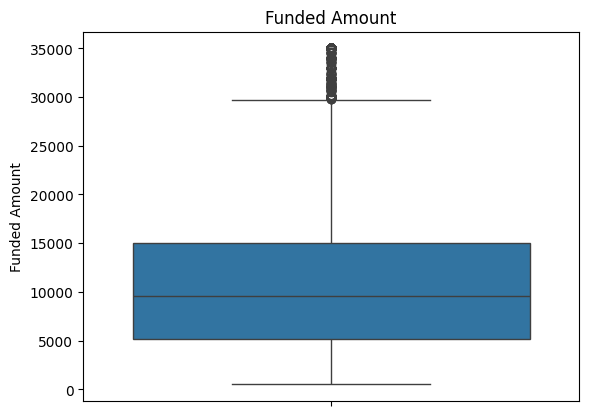

In [27]:
sns.boxplot(y='funded_amnt', data=df_selected_for_univariate)
plt.title('Funded Amount')
plt.ylabel('Funded Amount')
plt.show()

In [28]:
int_rate_amnt_stats = {
    'mean': df_selected_for_univariate['int_rate'].mean(),
    'std': df_selected_for_univariate['int_rate'].std(),
    '25%': df_selected_for_univariate['int_rate'].quantile(0.25),
    '50%': df_selected_for_univariate['int_rate'].quantile(0.50),
    '75%': df_selected_for_univariate['int_rate'].quantile(0.75)
}
print(int_rate_amnt_stats)

{'mean': np.float64(11.93221867952407), 'std': 3.6913274251360737, '25%': np.float64(8.94), '50%': np.float64(11.71), '75%': np.float64(14.38)}


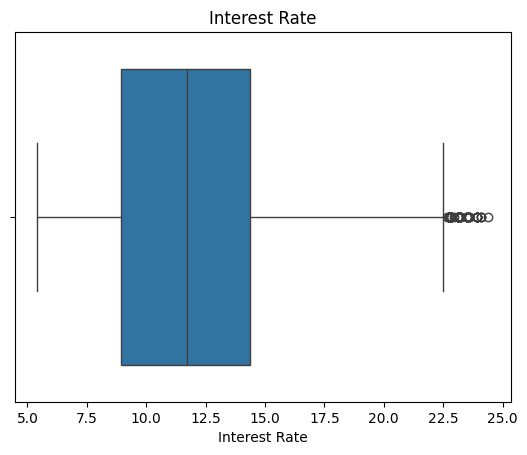

In [30]:
sns.boxplot(x='int_rate', data=df_selected_for_univariate)
plt.title('Interest Rate')
plt.xlabel('Interest Rate')
plt.show()

## Segmented and Derived Analysis

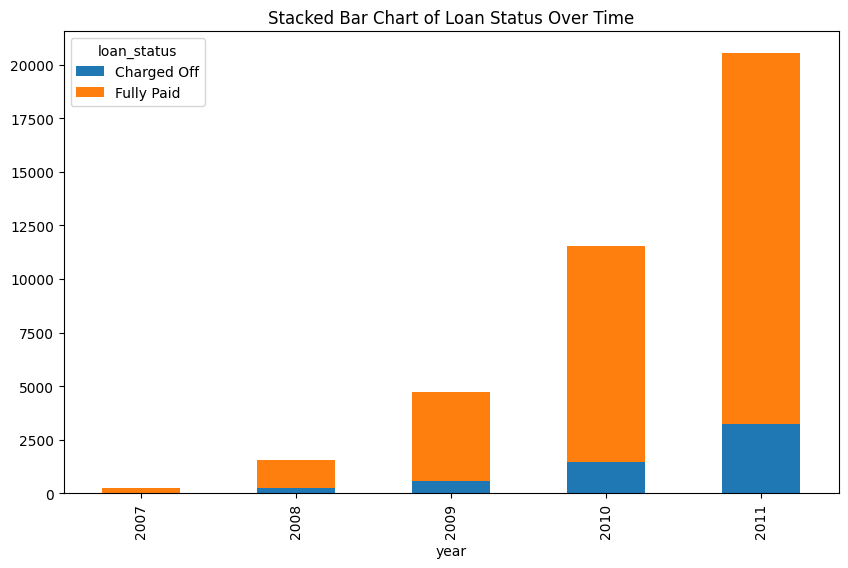

In [50]:
#### Derive Month and Year
loan_data['month'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y').dt.month
loan_data['year'] = pd.to_datetime(loan_data['issue_d'], format='%b-%y').dt.year

loan_data.groupby(['year','loan_status']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stacked Bar Chart of Loan Status Over Time')
plt.show()

In [15]:
df_purpose_term_status = loan_data[['purpose', 'term', 'loan_status']]
purpose_counts = loan_data['purpose'].value_counts()
purpose_unique = df_purpose_term_status['purpose'].unique()
df_purpose_charged_off = pd.DataFrame({'purpose': purpose_unique, 'charged_off_loans': None, 'total_loans': None, 'Fully_paid_loans': None, 'charged_off_percentage': None})

In [16]:
# figure out the charged off loan percentage against each purpose
df_purpose_charged_off['total_loans'] = df_purpose_charged_off['purpose'].apply(
    lambda p: (df_purpose_term_status['purpose'] == p).sum()
)

df_charged_off = df_purpose_term_status[df_purpose_term_status['loan_status'] == 'Charged Off']

df_purpose_charged_off['charged_off_loans'] = df_purpose_charged_off['purpose'].apply(
    lambda p: (df_charged_off['purpose'] == p).sum()
)

df_fully_paid = df_purpose_term_status[df_purpose_term_status['loan_status'] == 'Fully Paid']

df_purpose_charged_off['Fully_paid_loans'] = df_purpose_charged_off['purpose'].apply(
    lambda p: (df_fully_paid['purpose'] == p).sum()
)

df_purpose_charged_off['charged_off_percent'] = (
    df_purpose_charged_off['charged_off_loans'] / df_purpose_charged_off['total_loans'] * 100
)

display(df_purpose_charged_off)

,purpose,charged_off_loans,total_loans,Fully_paid_loans,charged_off_percentage,charged_off_percent
0,credit_card,542,5027,4485,None,10.781778
1,car,160,1499,1339,None,10.673783
2,small_business,475,1754,1279,None,27.080958
3,other,633,3865,3232,None,16.377749
4,wedding,96,926,830,None,10.367171
5,debt_consolidation,2767,18055,15288,None,15.325395
6,home_improvement,347,2875,2528,None,12.069565
7,major_purchase,222,2150,1928,None,10.325581
8,medical,106,681,575,None,15.565345
9,moving,92,576,484,None,15.972222


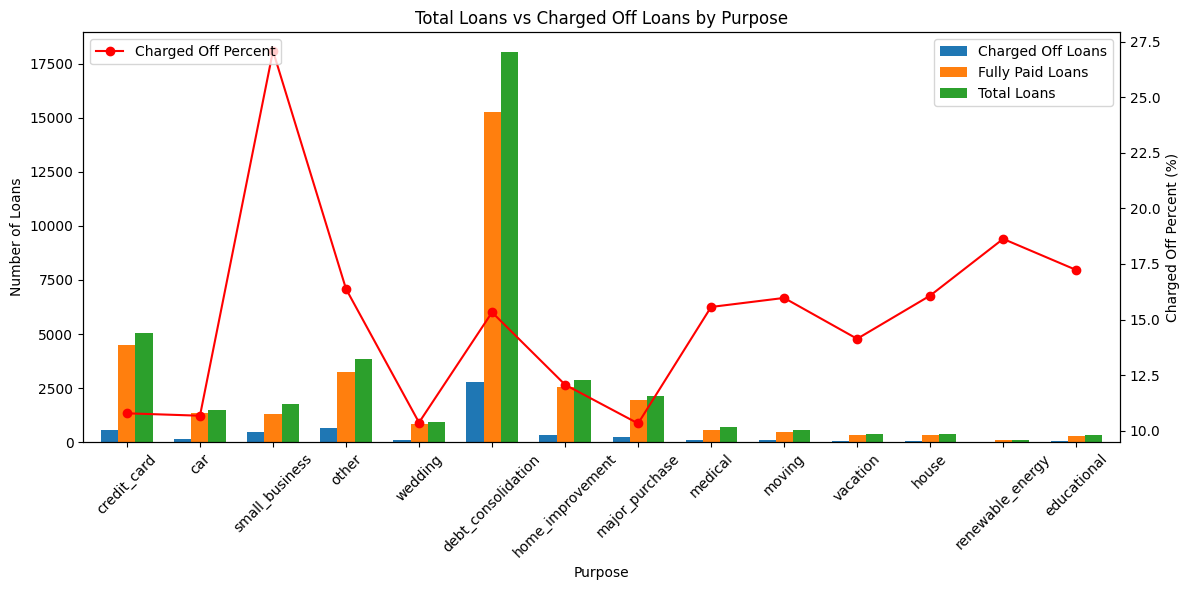

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for charged_off_loans and total_loans
df_purpose_charged_off.plot(
    x='purpose',
    y=['charged_off_loans', 'Fully_paid_loans', 'total_loans'],
    kind='bar',
    ax=ax1,
    width=0.7
 )

ax1.set_title('Total Loans vs Charged Off Loans by Purpose')
ax1.set_xlabel('Purpose')
ax1.set_ylabel('Number of Loans')
ax1.set_xticklabels(df_purpose_charged_off['purpose'], rotation=45)
ax1.legend(['Charged Off Loans', 'Fully Paid Loans', 'Total Loans'])

# Create a second y-axis for the line chart
ax2 = ax1.twinx()
ax2.plot(df_purpose_charged_off['purpose'], df_purpose_charged_off['charged_off_percent'], color='red', marker='o', label='Charged Off Percent')
ax2.set_ylabel('Charged Off Percent (%)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

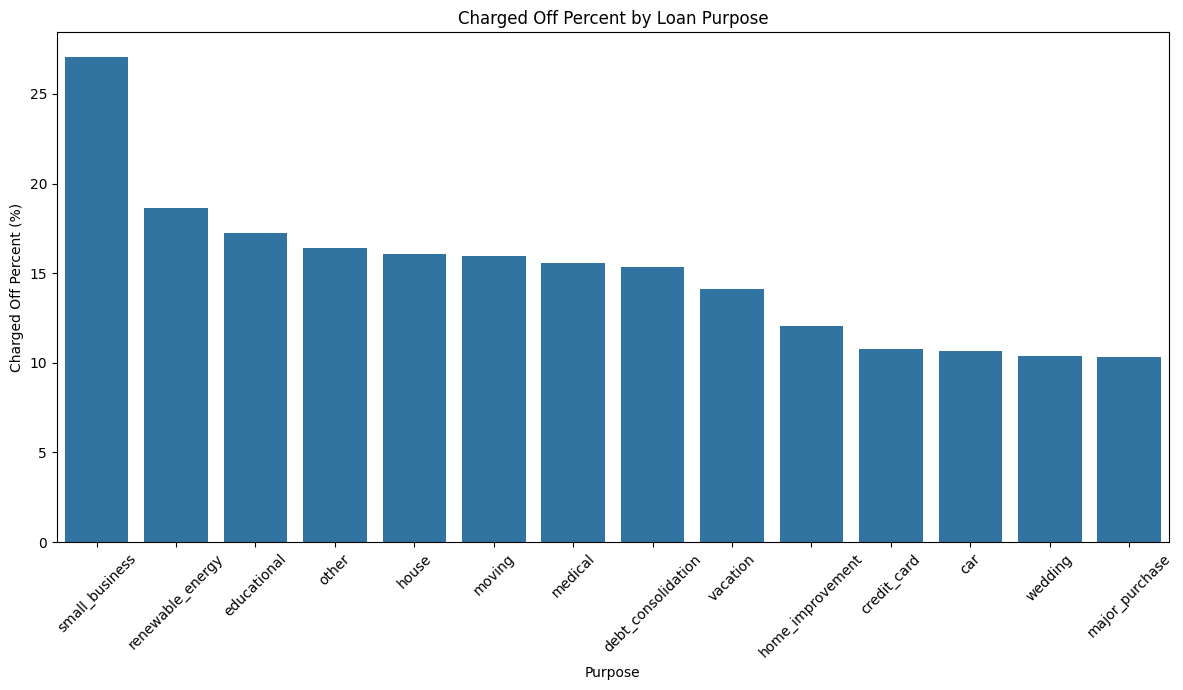

In [25]:
# show the purpose which has highest number of charged off loans
plt.figure(figsize=(12, 7))
df_purpose_sorted = df_purpose_charged_off.sort_values(by='charged_off_percent', ascending=False)
sns.barplot(x='purpose', y='charged_off_percent', data=df_purpose_sorted)
plt.title('Charged Off Percent by Loan Purpose')
plt.xlabel('Purpose')
plt.ylabel('Charged Off Percent (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Outcome - Small businesses have the highest percentage of charged-off loans

##Bivariate Analysis

Comparing loan_status and grade

In [31]:
grade_counts_by_status = loan_data.groupby('loan_status')['grade'].value_counts().unstack(fill_value=0)
display(grade_counts_by_status)

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,602,1425,1347,1118,715,319,101
Fully Paid,9443,10250,6487,3967,1948,657,198


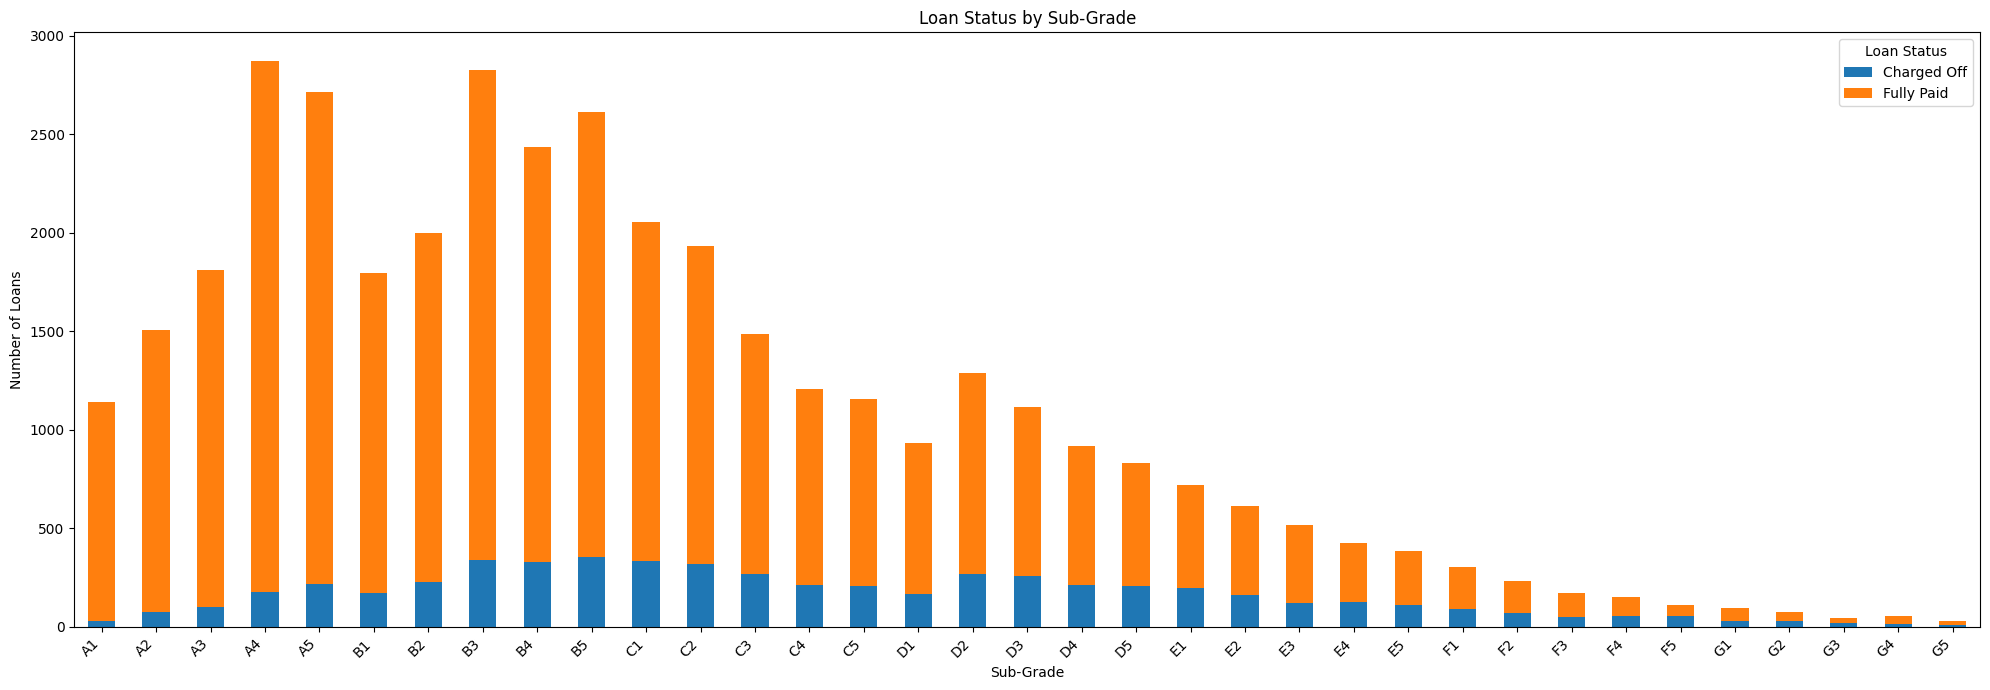

In [32]:
sub_grade_counts_by_status = loan_data.groupby('loan_status')['sub_grade'].value_counts().unstack(fill_value=0)
sub_grade_counts_by_status = sub_grade_counts_by_status.T

sub_grade_counts_by_status.plot(kind='bar', stacked=True, figsize=(20, 7))
plt.title('Loan Status by Sub-Grade')
plt.xlabel('Sub-Grade')
plt.ylabel('Number of Loans')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Loan Status')
plt.tight_layout()
plt.show()

Outcome - Higher Charged-Off Counts in Mid-Range Sub-Grades: The sub-grades in the 'B', 'C', and 'D' categories seem to have a higher number of charged-off loans compared to the 'A' sub-grades (lower risk) and the 'F' and 'G' sub-grades (higher risk).

### Continuous analysis

Using the outcome of univariate analysis where we found that small businesses had higher defaulting percentage. Further we drill down for the small businesses what are the other factors that influence loan defaulting

In [43]:
loan_data_charged_off = loan_data[loan_data['loan_status'].isin(['Charged Off'])]
loan_data_co_small = loan_data_charged_off[loan_data_charged_off['purpose'].isin(['small_business'])]

In [44]:
loan_data_bi_continuous = loan_data_co_small[['dti','annual_inc','int_rate','loan_amnt','term']]

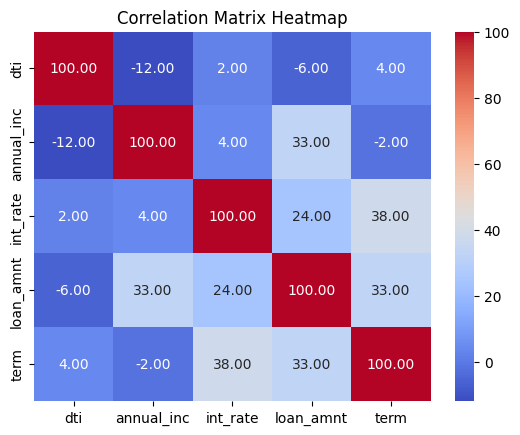

In [45]:
#### Create correlation percentage matrix and heatmap
corr_matrix = loan_data_bi_continuous.corr().round(2)
sns.heatmap(corr_matrix * 100, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

##Categorical analysis

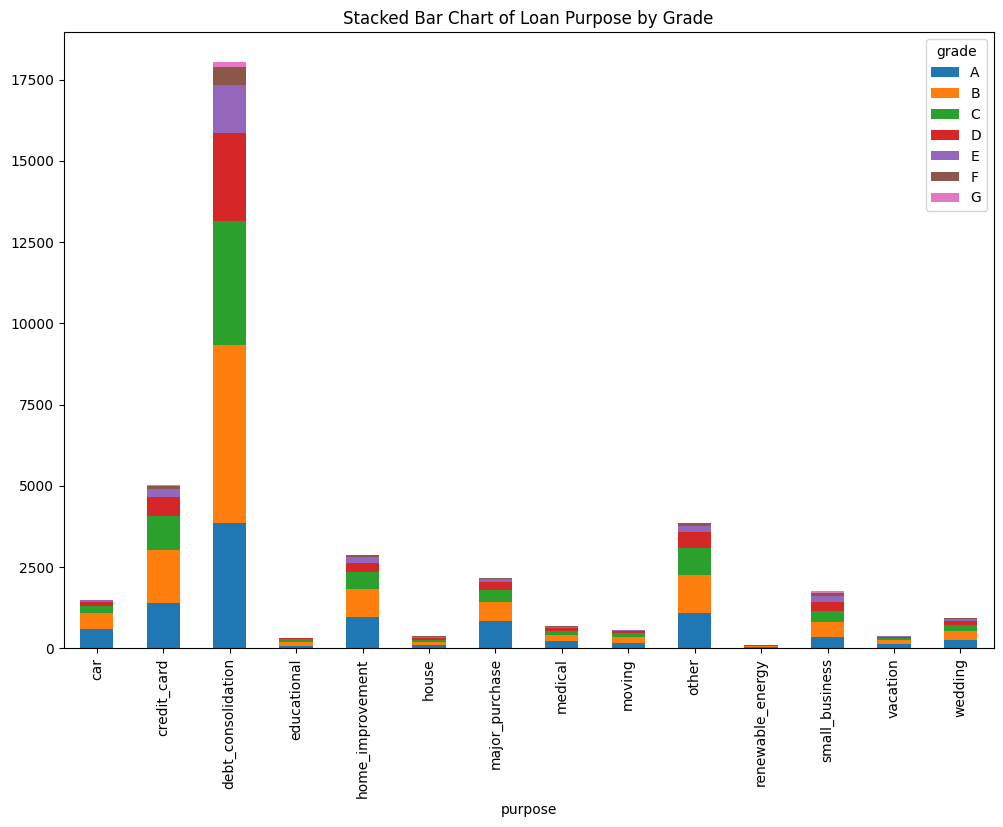

In [49]:
pivot_loan_data = loan_data.groupby(['grade','purpose']).size().reset_index(name='count').pivot(index='purpose', columns='grade', values='count')
pivot_loan_data.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title('Stacked Bar Chart of Loan Purpose by Grade')
plt.show()